### **Importing all the libraries and packages**

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib  import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout, Flatten, MaxPooling2D


### **Loading and splitting  the data from tensorflow.keras**

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
print("Training Images : {} ",format(x_train.shape))
print("testing images : {} ",format(x_test.shape))

170508288/170498071 [==============================] - 3s 0us/step
Training Images : {}  (50000, 32, 32, 3)
testing images : {}  (10000, 32, 32, 3)


In [3]:
print(x_train[0].shape)

(32, 32, 3)


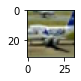

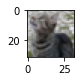

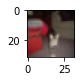

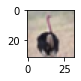

In [4]:
for i in range(332,336):
    plt.subplot(120+1+i)
    img=x_train[i]
    plt.imshow(img)
    plt.show()

### **PreProcessing the Data**

In [5]:
from types import new_class
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test=x_test/255
n_classes=10

print("Shape befor one-hot encoding : ",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape After one-hot encoding : ",y_train.shape)

Shape befor one-hot encoding :  (50000, 1)
Shape After one-hot encoding :  (50000, 10)


### **Building the Model**

In [6]:
model=Sequential()

#Convolutional Layers 

model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))


model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Hidden Layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

#output Layer
model.add(Dense(10,activation='softmax'))

#Compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 561s 1s/step - loss: 1.6468 - accuracy: 0.3949 - val_loss: 1.2044 - val_accuracy: 0.5617
Epoch 2/10
391/391 [==============================] - 560s 1s/step - loss: 1.1408 - accuracy: 0.5937 - val_loss: 1.0169 - val_accuracy: 0.6485
Epoch 3/10
391/391 [==============================] - 548s 1s/step - loss: 0.9542 - accuracy: 0.6671 - val_loss: 0.8137 - val_accuracy: 0.7151
Epoch 4/10
391/391 [==============================] - 537s 1s/step - loss: 0.8349 - accuracy: 0.7073 - val_loss: 0.7625 - val_accuracy: 0.7346
Epoch 5/10
391/391 [==============================] - 537s 1s/step - loss: 0.7648 - accuracy: 0.7327 - val_loss: 0.7308 - val_accuracy: 0.7451
Epoch 6/10
391/391 [==============================] - 537s 1s/step - loss: 0.6994 - accuracy: 0.7554 - val_loss: 0.7055 - val_accuracy: 0.7515
Epoch 7/10
391/391 [==============================] - 534s 1s/step - loss: 0.6368 - accuracy: 0.7789 - val_loss: 0.6929 - val_accuracy: 0.7590

##Predicting

In [8]:
classes =range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))
batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 143ms/step


In [9]:
print(predictions)

[[1.4007994e-04 8.3006444e-06 2.6420888e-02 1.1383673e-02 6.9427317e-01
  4.1752569e-02 6.6480628e-04 2.2522223e-01 6.8476205e-05 6.5761174e-05]
 [5.5704394e-04 9.4597948e-05 2.7778633e-02 1.8507674e-01 4.4144459e-02
  4.1520596e-01 1.6797192e-02 3.0955020e-01 9.9172968e-05 6.9592684e-04]
 [8.1008966e-07 1.2467792e-05 1.8940951e-03 3.9411052e-03 1.9642124e-05
  1.3244237e-03 9.9275392e-01 3.9133127e-05 1.0837557e-05 3.4483901e-06]
 [2.3153792e-05 3.4206496e-05 2.4366097e-03 6.8099535e-01 1.3479069e-02
  3.1499099e-02 2.7121547e-01 1.6570414e-04 3.1730047e-05 1.1963551e-04]
 [2.2067935e-07 9.9934810e-01 6.6545491e-10 1.9020829e-09 5.5871020e-12
  2.7030000e-11 4.2677692e-09 1.0940141e-11 2.9296587e-05 6.2239810e-04]
 [1.9753630e-04 9.9135953e-01 4.2923980e-06 1.1597424e-05 2.1783174e-07
  2.4866850e-07 5.8317405e-06 2.6712334e-08 2.1498105e-03 6.2709469e-03]
 [2.7840570e-02 2.0512758e-05 1.3721974e-01 3.9762029e-01 1.5255983e-03
  3.7058700e-02 3.8942310e-01 1.8569169e-04 9.0882005e-03 

In [10]:
for image in predictions:
  print(np.sum(image))

0.99999994
0.99999994
0.99999994
1.0
1.0000001
1.0000001
0.99999994
0.99999994
0.99999994


In [15]:
class_results=np.argmax(predictions,axis=-1)
print(class_results)

[4 5 6 3 1 1 3 6 8]


##Final Object Detection 

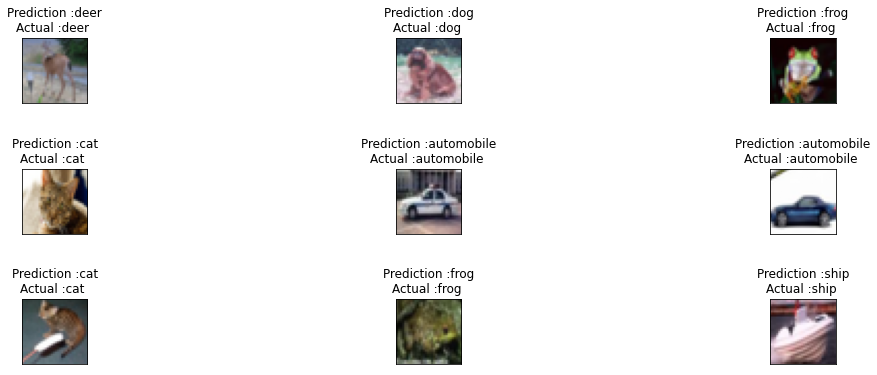

In [16]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_results[i]==key:
      title="Prediction :{}\nActual :{} ".format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

    #plot the image
    axs[i].imshow(img)

#show the plot
plt.show()

